In [12]:
# Bibliotecas importadas
import numpy as np
from sklearn import neighbors
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# define a função para ler arquivos e transformar em matrizes
def le(nomearq):
  with open(nomearq,"r") as f:
    linhas = f.readlines()
  # primeira linha dos arquivos tem o numero de linhas e o numero de colunas
  linha0 = linhas[0].split()
  numeroLinhas=int(linha0[0])
  numeroColunas=int(linha0[1])
  a=np.empty((numeroLinhas,numeroColunas),dtype=np.float32)
  for l in range(numeroLinhas):
    linha=linhas[l+1].split()
    for c in range(numeroColunas):
      a[l,c] = np.float32(linha[c])
  return a

In [11]:
## main
ax = le("ax.txt") # Base de treino das features
ay = le("ay.txt") # Base de treino das labels
qx = le("qx.txt") # Base de teste das features
qy = le("qy.txt") # Base de teste das labels

# classificador KNN
vizinho = neighbors.KNeighborsClassifier(n_neighbors=1,weights="uniform", algorithm="brute")
# Treina o classificador com a base de teste
vizinho.fit(ax,ay.ravel())
# Realiza a predição na base de teste
qp = vizinho.predict(qx)
erros=0
for i in range(qp.shape[0]):
  if qp[i]!=qy[i]: erros+=1
print("Erros=%d/%d.   Pct=%1.3f%%\n"%(erros,qp.shape[0],100.0*erros/qp.shape[0]))


Erros=1/60.   Pct=1.667%



Faz o plot da superficie de decisão

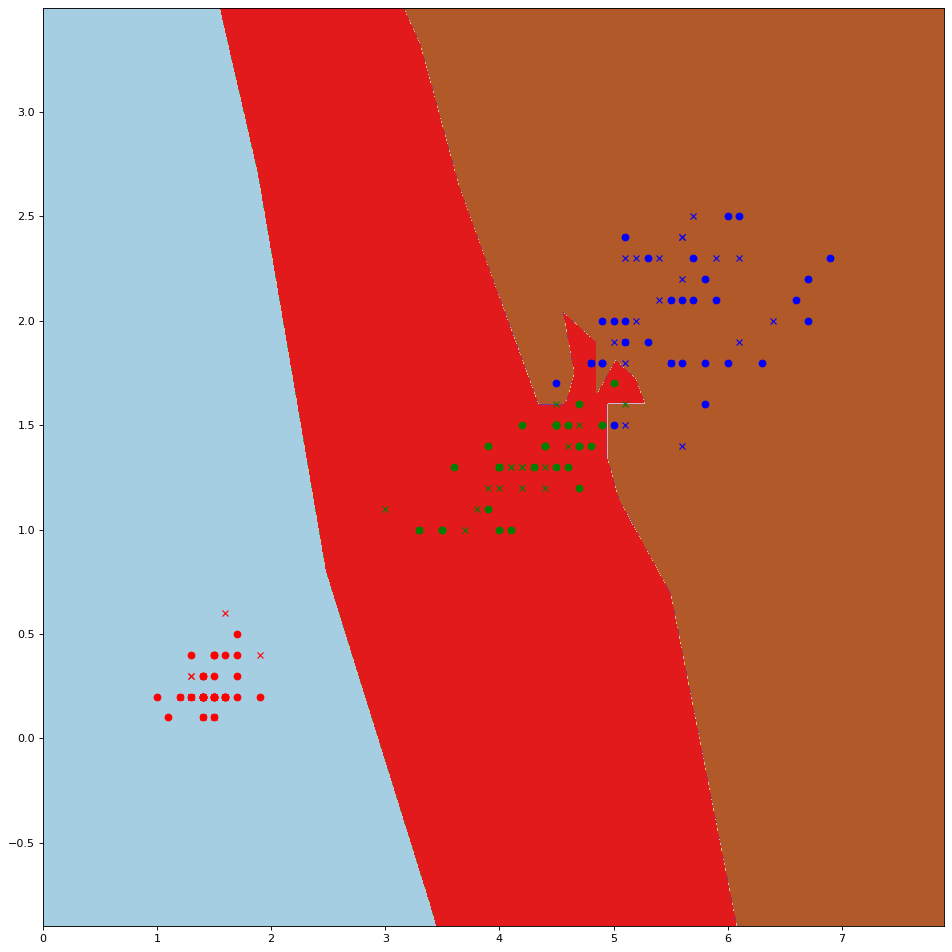

In [4]:
#https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/
fig=plt.figure(figsize=(12, 12), dpi=80);
for i in range(ax.shape[0]):
  if   ay[i]==0: plt.plot(ax[i,0], ax[i,1], 'ro');
  elif ay[i]==1: plt.plot(ax[i,0], ax[i,1], 'go');
  elif ay[i]==2: plt.plot(ax[i,0], ax[i,1], 'bo');
for i in range(qx.shape[0]):
  if   qy[i]==0: plt.plot(qx[i,0], qx[i,1], 'rx');
  elif qy[i]==1: plt.plot(qx[i,0], qx[i,1], 'gx');
  elif qy[i]==2: plt.plot(qx[i,0], qx[i,1], 'bx');

minx = min( ax[:, 0].min()-1, qx[:, 0].min()-1 )
maxx = max( ax[:, 0].max()+1, qx[:, 0].max()+1 )
miny = min( ax[:, 1].min()-1, qx[:, 1].min()-1 )
maxy = max( ax[:, 1].max()+1, qx[:, 1].max()+1 )

gridx = np.arange(minx, maxx, 0.005)
gridy = np.arange(miny, maxy, 0.002)
xx, yy = np.meshgrid(gridx, gridy)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = vizinho.predict(grid)
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.tight_layout(); plt.show(); fig.savefig("iris_nn.png")

In [13]:
arvore = tree.DecisionTreeClassifier()
arvore = arvore.fit(ax,ay)
qp=arvore.predict(qx)
erros=0;
for i in range(qp.shape[0]):
  if qp[i]!=qy[i]: erros+=1
print("Erros=%d/%d.   Pct=%1.3f%%\n"%(erros,qp.shape[0],100.0*erros/qp.shape[0]))

Erros=2/60.   Pct=3.333%



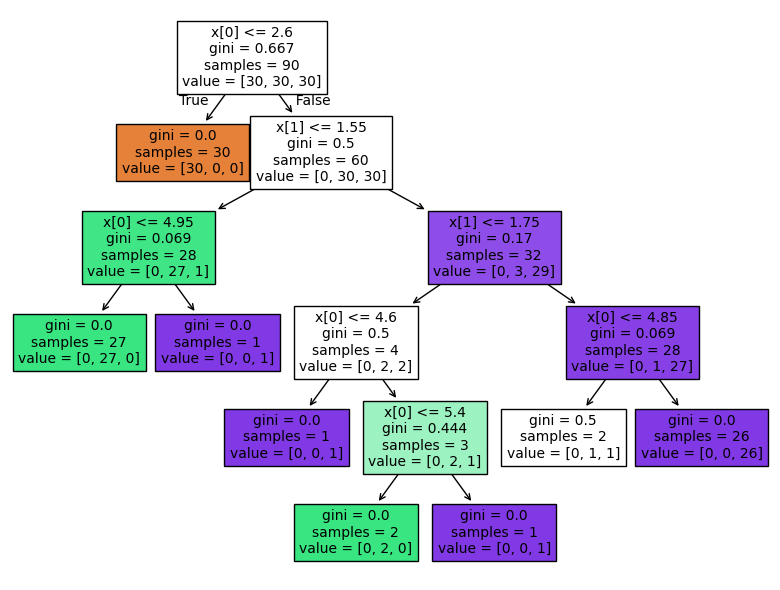

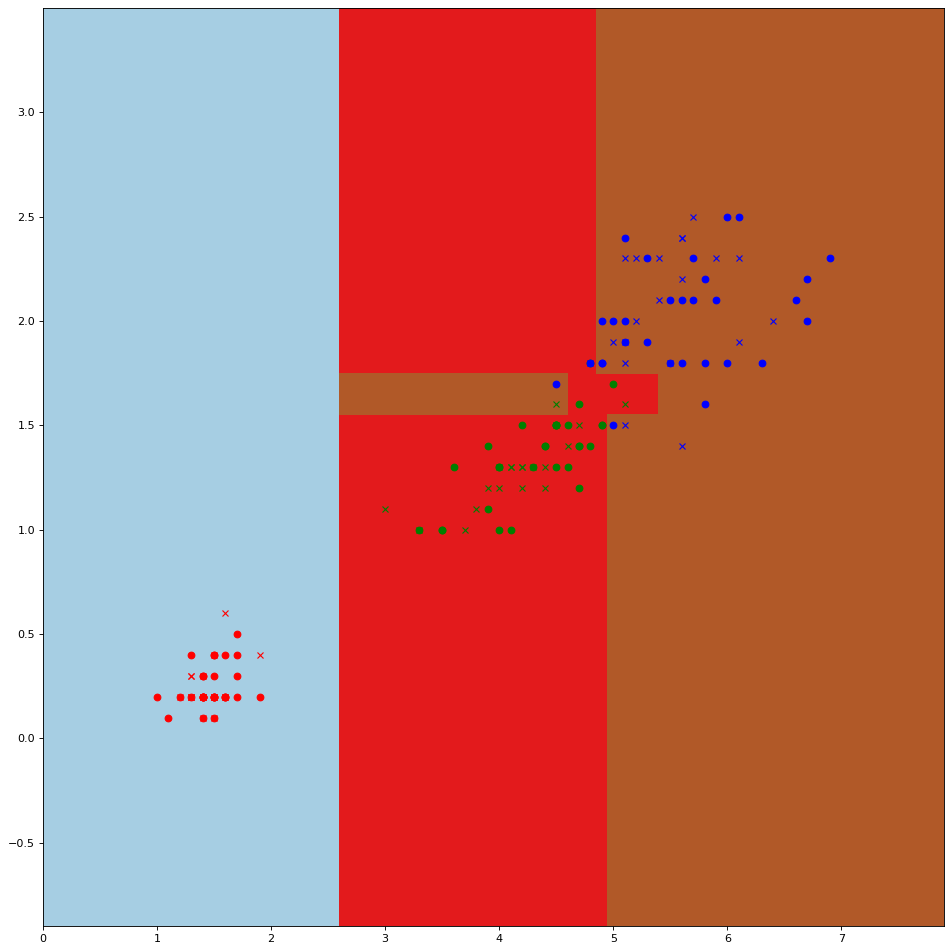

In [14]:
fig=plt.figure(figsize=(8,6))
tree.plot_tree(arvore,filled=True,fontsize=10)
plt.tight_layout(); plt.show(); fig.savefig("iris_dt2a.png")

#https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/
fig=plt.figure(figsize=(12, 12), dpi=80); #plt.axis([0, 100, 0, 100])
for i in range(ax.shape[0]):
  if   ay[i]==0: plt.plot(ax[i,0], ax[i,1], 'ro');
  elif ay[i]==1: plt.plot(ax[i,0], ax[i,1], 'go');
  elif ay[i]==2: plt.plot(ax[i,0], ax[i,1], 'bo');
for i in range(qx.shape[0]):
  if   qy[i]==0: plt.plot(qx[i,0], qx[i,1], 'rx');
  elif qy[i]==1: plt.plot(qx[i,0], qx[i,1], 'gx');
  elif qy[i]==2: plt.plot(qx[i,0], qx[i,1], 'bx');

minx = min( ax[:, 0].min()-1, qx[:, 0].min()-1 )
maxx = max( ax[:, 0].max()+1, qx[:, 0].max()+1 )
miny = min( ax[:, 1].min()-1, qx[:, 1].min()-1 )
maxy = max( ax[:, 1].max()+1, qx[:, 1].max()+1 )

gridx = np.arange(minx, maxx, 0.001)
gridy = np.arange(miny, maxy, 0.0005)
xx, yy = np.meshgrid(gridx, gridy)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = arvore.predict(grid)
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.tight_layout(); plt.show(); fig.savefig("iris_dt2b.png")